# Compiling the different versions of Micro-Aevol 2

In [2]:
import os
import subprocess

KOKKOS_LIB_CMAKE = "Kokkos_DIR={0}/lib/cmake/Kokkos".format(os.environ.get("KOKKOS_INSTALL_DIR"))
print(KOKKOS_LIB_CMAKE)

EXE_NAME = "micro_aevol_kokkos"

Kokkos_DIR=/home/onyr/Kokkos/kokkos_install/lib/cmake/Kokkos


In [3]:
# parameters

experiment_params = {
    "dna_sizes": [100, 250, 500], # size of DNA
    "mutation_rates": [0.000001, 0.00001, 0.0001], # mutation rate
    "world_sizes": [32, 64, 128, 256, 512], # size of the world
}

# get project names from dirs in ./aevols directory
project_names = [d for d in os.listdir("./aevols") if os.path.isdir(os.path.join("./aevols", d))]
print(project_names)

['aevol_0']


### Prepare tracing

In [4]:
csv_result_file = "stats.csv"
csv_headers = {
    'world_size_width': int,
    'world_size_height': int,
    'dna_size': int,
    'mutation_rate': float,
    'nb_generations': int,
    'runtime' : float
}

repeats = 5

In [48]:
import os
import subprocess

def create_csv_file(dirpath: str):
    filepath = dirpath + csv_result_file
    print(f"Creating NEW CSV file ({filepath})")
    f = open(filepath, "w")
    f.write(",".join(csv_headers.keys()) + "\n")
    f.close()

def clean_and_mkdir(dirpath: str):
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)
    else:
        print(f"{dirpath} directory already exists")
        print(f"removing previous {dirpath} directory")
        subprocess.run(["rm", "-rf", dirpath])
        os.makedirs(dirpath)

for project_name in project_names:
    # create csv file
    stats_dir = "./aevols/" + project_name + "/stats/"
    clean_and_mkdir(stats_dir)
    create_csv_file(stats_dir)

./aevols/aevol_0/stats/ directory already exists
removing previous ./aevols/aevol_0/stats/ directory
Creating NEW CSV file (./aevols/aevol_0/stats/stats.csv)


## Compiling & Run executables

In [49]:
# compile
for project_name in project_names:
    # create directory build & 
    # stats, create csv file
    build_dir = "./aevols/" + project_name + "/build/"
    clean_and_mkdir(build_dir)
    
    # run cmake to generate makefiles
    subprocess.run(["cmake", "-B", f"./aevols/{project_name}/build", "-S", f"./aevols/{project_name}", "-D", KOKKOS_LIB_CMAKE])

    # run make to compile
    subprocess.run(["make", "-C", f"./aevols/{project_name}/build"])

./aevols/aevol_0/build/ directory already exists
removing previous ./aevols/aevol_0/build/ directory
-- The C compiler identification is GNU 11.3.0
-- The CXX compiler identification is GNU 11.3.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Runtime traces are activated
-- Found ZLIB: /usr/lib/x86_64-linux-gnu/libz.so (found version "1.2.11") 
-- Enabled Kokkos devices: OPENMP;CUDA;SERIAL
-- kokkos_launch_compiler is enabled globally. C++ compiler commands with -DKOKKOS_DEPENDENCE will be redirected to the appropriate compiler for Kokkos
-- Configuring done
-- Generating done
-- Build files have been written to: /home/onyr/Do

CMAKE_PREFIX_PATH = /home/onyr/Kokkos/kokkos_install:/home/onyr/Kokkos/kokkos_install/lib/CMake/Kokkos:/home/onyr/Kokkos/kokkos_install/lib/cmake/Kokkos
CMake Warning at /home/onyr/Kokkos/kokkos_install/lib/cmake/Kokkos/KokkosConfigCommon.cmake:35 (MESSAGE):
  The installed Kokkos configuration does not support CXX extensions.
  Forcing -DCMAKE_CXX_EXTENSIONS=Off
Call Stack (most recent call first):
  /home/onyr/Kokkos/kokkos_install/lib/cmake/Kokkos/KokkosConfig.cmake:56 (INCLUDE)
  CMakeLists.txt:33 (find_package)


Done. micro_aevol_kokkos is ready to be executed.


[ 16%] Building CXX object CMakeFiles/micro_aevol.dir/ExpManager.cpp.o
[ 25%] Building CXX object CMakeFiles/micro_aevol.dir/AeTime.cpp.o
[ 33%] Building CXX object CMakeFiles/micro_aevol.dir/DnaMutator.cpp.o
[ 41%] Building CXX object CMakeFiles/micro_aevol.dir/MutationEvent.cpp.o
[ 50%] Building CXX object CMakeFiles/micro_aevol.dir/Organism.cpp.o
[ 58%] Building CXX object CMakeFiles/micro_aevol.dir/Stats.cpp.o
[ 66%] Building CXX object CMakeFiles/micro_aevol.dir/Threefry.cpp.o
[ 75%] Building CXX object CMakeFiles/micro_aevol.dir/Dna.cpp.o


/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_0/Dna.cpp(86): warning #177-D: variable "duplicate_segment" was declared but never referenced

/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_0/Dna.cpp(88): warning #177-D: variable "seg_length" was declared but never referenced



[ 83%] Linking CXX static library libmicro_aevol.a
make[2]: Leaving directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_0/build'
[ 83%] Built target micro_aevol
make[2]: Entering directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_0/build'
make[2]: Leaving directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_0/build'
make[2]: Entering directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_0/build'
[ 91%] Building CXX object CMakeFiles/micro_aevol_kokkos.dir/main.cpp.o
[100%] Linking CXX executable micro_aevol_kokkos
make[2]: Leaving directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_0/build'
[100%] Built target micro_aevol_kokkos
make[1]: Leaving directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_0/build'
make: Leaving directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_0/build'


In [50]:
# execute
run_once = False
for project_name in project_names:
    for dna_size in experiment_params["dna_sizes"]:
        for mutation_rate in experiment_params["mutation_rates"]:
            for world_size in experiment_params["world_sizes"]:
                print("Running {} with dna_size={}, mutation_rate={}, world_size={}".format(project_name, dna_size, mutation_rate, world_size))
                
                # run the executable
                current_dir = os.getcwd()
                program_filepath = current_dir + "/aevols/" + project_name + "/build/" + EXE_NAME
                args = (program_filepath, 
                    "-w", str(world_size), 
                    "-h", str(world_size),
                    "-g", str(dna_size),
                    "-m", str(mutation_rate),
                )
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()

                # run once only
                if run_once:
                    break
            if run_once:
                break
        if run_once:
            break
    if run_once:
        break

Running aevol_0 with dna_size=500, mutation_rate=0.0001, world_size=32
Running aevol_0 with dna_size=500, mutation_rate=0.0001, world_size=64
Running aevol_0 with dna_size=500, mutation_rate=0.0001, world_size=128
Running aevol_0 with dna_size=500, mutation_rate=0.0001, world_size=256
Running aevol_0 with dna_size=500, mutation_rate=0.0001, world_size=1024
Running aevol_0 with dna_size=500, mutation_rate=1e-05, world_size=32
Running aevol_0 with dna_size=500, mutation_rate=1e-05, world_size=64
Running aevol_0 with dna_size=500, mutation_rate=1e-05, world_size=128
Running aevol_0 with dna_size=500, mutation_rate=1e-05, world_size=256
Running aevol_0 with dna_size=500, mutation_rate=1e-05, world_size=1024
Running aevol_0 with dna_size=500, mutation_rate=1e-06, world_size=32
Running aevol_0 with dna_size=500, mutation_rate=1e-06, world_size=64
Running aevol_0 with dna_size=500, mutation_rate=1e-06, world_size=128
Running aevol_0 with dna_size=500, mutation_rate=1e-06, world_size=256
Runni

KeyboardInterrupt: 

# Graphs & Analysis

In [11]:
# get the data from aevol/*/stats/stats.csv
import pandas as pd
from IPython.display import display

df = pd.DataFrame()
for project_name in project_names:
    stats_dir = "./aevols/" + project_name + "/stats/"

    # add a version column with project_name
    df = pd.read_csv(stats_dir + csv_result_file)
    df["version"] = project_name

    # append to data
    df = df.append(df)

display(df.head())

/tmp/ipykernel_30185/3581989233.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df)


,world_size_width,world_size_height,dna_size,mutation_rate,nb_generations,runtime,version
0,32,32,500,0.0001,1000,1.505624,aevol_0
1,64,64,500,0.0001,1000,6.568119,aevol_0
2,128,128,500,0.0001,1000,30.343228,aevol_0
3,256,256,500,0.0001,1000,126.530802,aevol_0
4,1024,1024,500,0.0001,1000,2163.977339,aevol_0


{'aevol_0': (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)}


/tmp/ipykernel_30185/4066137155.py:49: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g0 = sns.lineplot(


ValueError: 'log2' is not a valid value for scale; supported values are 'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'

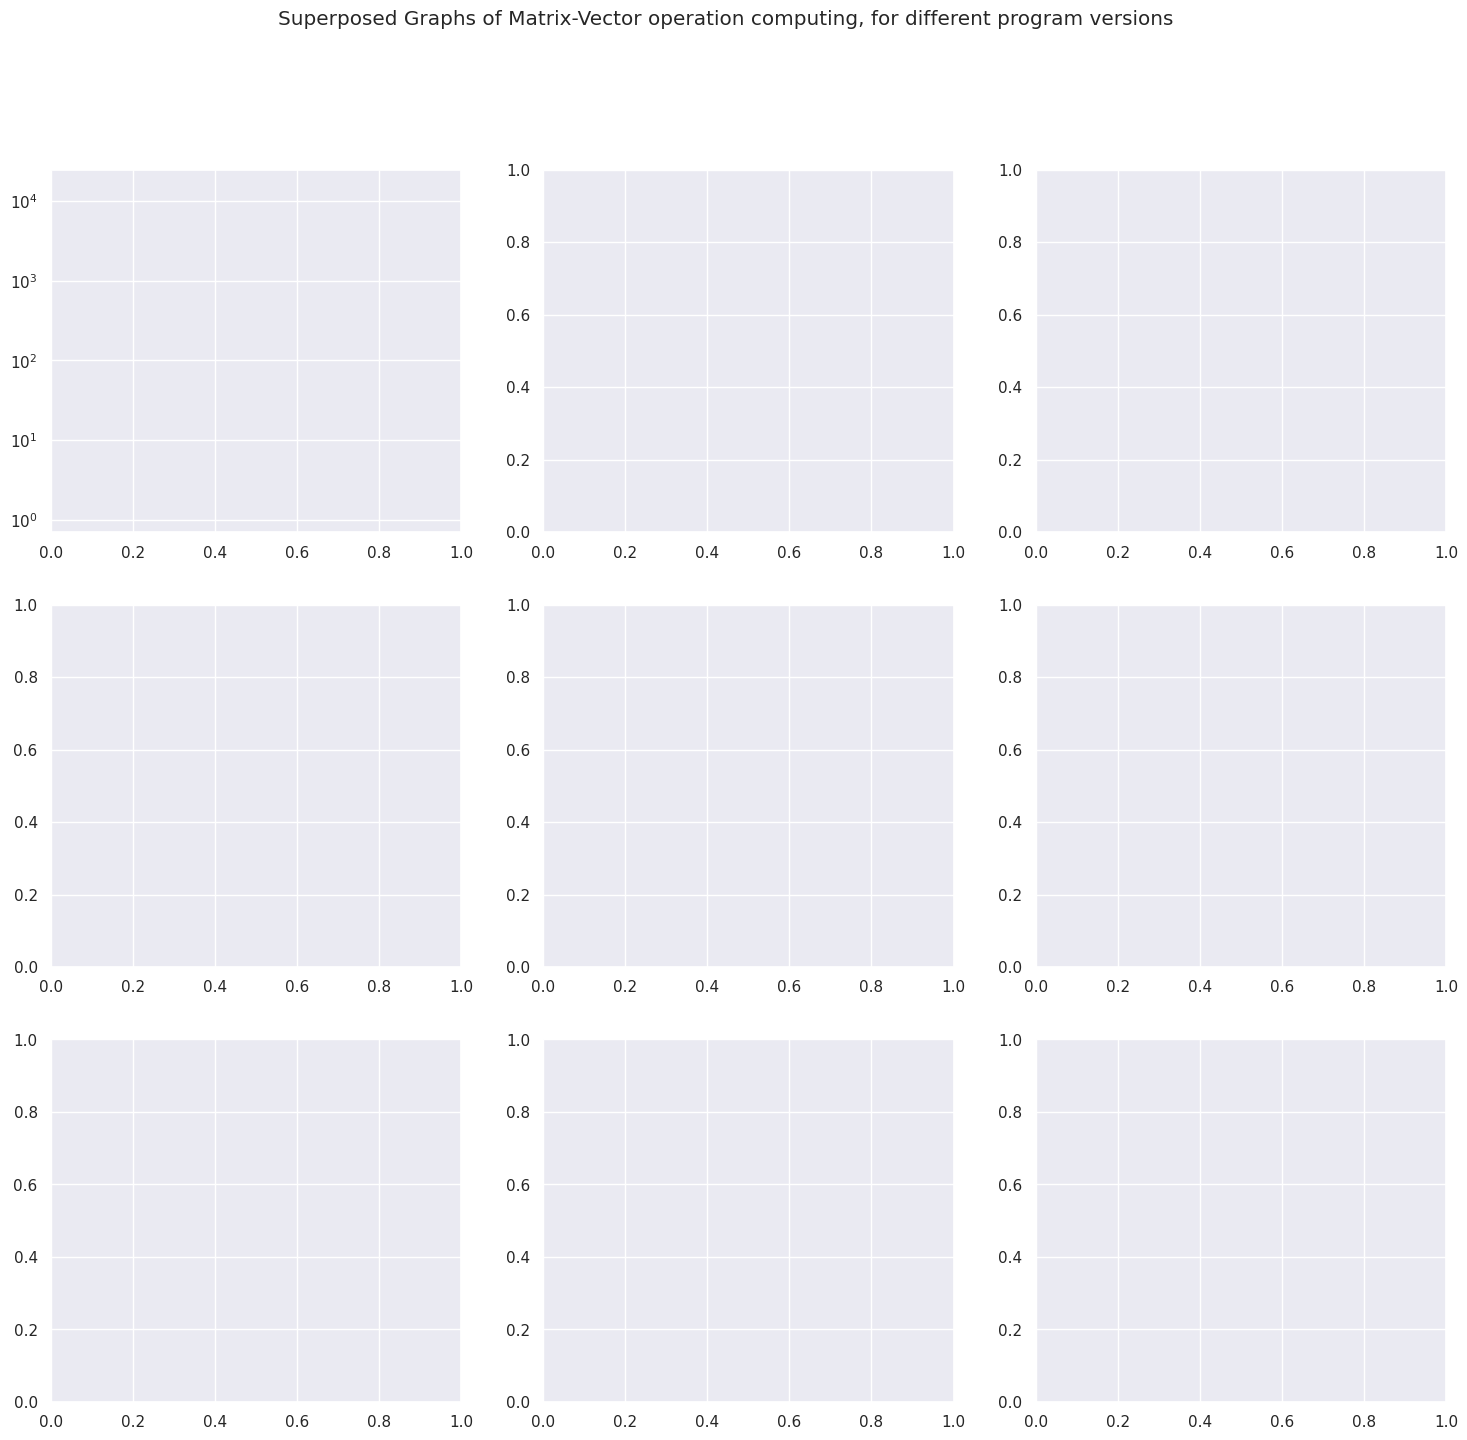

In [13]:
# plot the data
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from numpy import genfromtxt
import itertools
import pandas as pd
import seaborn as sns

sns.set()

# filter out 0 runtime values
df = df[df.runtime > 0]

# create a palette for every version
palette = itertools.cycle(sns.color_palette(
    n_colors=len(project_names),
))
version_palette = {}
for project_name in project_names:
    version_palette[project_name] = next(palette)
print(version_palette)


# display the graph
def display_graph(df: pd.DataFrame):
    COLUMNS = len(experiment_params["dna_sizes"])
    ROWS = len(experiment_params["mutation_rates"])

    # display graphs
    fig, ax = plt.subplots(COLUMNS, ROWS, figsize=(18,16))
    fig.suptitle("Superposed Graphs of Matrix-Vector operation computing, for different program versions")

    for i in range(ROWS):
        dna_size = experiment_params["dna_sizes"][i]

        for j in range(COLUMNS):
            mutation_rate = experiment_params["mutation_rates"][j]

            for k in range(0, len(version_palette.keys())):
                # print version graph data
                graph_version = list(version_palette.keys())[k]
                
                # filter out data
                df_plot_0 = df[df['version'] == graph_version]
                df_plot_1 = df_plot_0[df_plot_0['dna_size'] == dna_size]
                df_plot_2 = df_plot_1[df_plot_1['mutation_rate'] == mutation_rate]
                
                g0 = sns.lineplot(
                    ax=ax[i][j],
                    data=df_plot_2, 
                    x="world_size_width",
                    y="runtime", 
                    hue="version",
                    palette=version_palette,
                    style="version",
                )
                g0.set(ylim=(df.runtime.min(), df.runtime.max()))
                g0.set(yscale="log")
                g0.set(title=f"dna_size={dna_size}, mutation_rate={mutation_rate}")
                g0.set(xlabel="World size", ylabel="runtime (s)")
                g00 = sns.scatterplot(
                    ax=ax[i][j],
                    data=df_plot_2, 
                    x="world_size_width",
                    y="runtime", 
                    hue="version",
                    palette=version_palette,
                    legend=False,
                )
                g00.set(ylim=(df.runtime.min(), df.runtime.max()))
                g00.set(yscale="log")
        
    plt.show()


display_graph(df)